In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
%matplotlib inline

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Anomaly detection/clustered_DBSCAN dataset')

In [36]:
df.head(100)

,Packet Length,Anomaly Scores,clusters_labels,Protocol_ICMP,Protocol_TCP,Protocol_UDP,Packet Type_Control,Packet Type_Data,Traffic Type_DNS,Traffic Type_FTP,Traffic Type_HTTP
0,306,87.42,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1022,54.05,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,554,97.82,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1178,5.39,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,765,47.31,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95,641,12.38,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
96,697,52.79,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
97,823,2.66,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
98,343,37.54,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [8]:
df = df.drop(['Payload Data' , 'Malware Indicators' , 'Alerts/Warnings' , 'IDS/IPS Alerts' , 'Firewall Logs' , 'Severity Level', 'Network Segment',
       'Log Source' , 'Attack Type',
       'Attack Signature', 'Action Taken'] , axis = 1)
#df = df.drop(['Payload Data' , 'Malware Indicators' , 'Alerts/Warnings' , 'IDS/IPS Alerts' , 'Firewall Logs'] , axis = 1)

In [9]:
df.head()

,Protocol,Packet Length,Packet Type,Traffic Type,Anomaly Scores,clusters_labels
0,UDP,306,Control,HTTP,87.42,1
1,ICMP,1022,Data,DNS,54.05,1
2,TCP,554,Control,DNS,97.82,1
3,ICMP,1178,Data,HTTP,5.39,1
4,ICMP,765,Control,DNS,47.31,1


In [10]:
categorical_values = df.select_dtypes(include = ['object' , 'bool']).columns
numerical_values = df.select_dtypes(include = ['float' , 'int']).columns

In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
encoded_data = ohe.fit_transform(df[categorical_values])
# Fit and transform the categorical variable
encoded_data = ohe.fit_transform(df[categorical_values])

# Get the feature names after one-hot encoding
feature_names = ohe.get_feature_names_out(categorical_values)

# Create a new DataFrame with one-hot encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Drop the original categorical columns from the DataFrame
df.drop(columns=categorical_values, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Save the final DataFrame with one-hot encoding to a new CSV file
#final_df.to_csv('encoded_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
encoded_data.shape

(1237, 8)

In [13]:
#x = df.drop(['Malware Indicators' , 'Malware Indicators' , 'Firewall Logs' , 'IDS/IPS Alerts' , 'clusters_labels'] , axis = 1)
x = df.drop(['clusters_labels'] , axis = 1)

y = df['clusters_labels']

In [14]:
x

,Packet Length,Anomaly Scores,Protocol_ICMP,Protocol_TCP,Protocol_UDP,Packet Type_Control,Packet Type_Data,Traffic Type_DNS,Traffic Type_FTP,Traffic Type_HTTP
0,306,87.42,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1022,54.05,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,554,97.82,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1178,5.39,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,765,47.31,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1232,1003,48.15,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1233,361,76.20,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1234,665,95.85,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1235,143,12.12,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [15]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x_scaled = mms.fit_transform(x)
df1 = pd.DataFrame(x_scaled)

df1.head()

,0,1,2,3,4,5,6,7,8,9
0,0.168524,0.874337,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.667131,0.540470,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.341226,0.978389,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.775766,0.053627,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.488162,0.473037,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [16]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(x_scaled)

In [17]:
x_pca.shape

(1237, 10)

In [18]:
pca.n_components_

10

In [19]:
pca.explained_variance_ratio_

array([2.51614956e-01, 1.76459961e-01, 1.68769555e-01, 1.61418855e-01,
       1.58094839e-01, 4.27945044e-02, 4.08473302e-02, 1.32542646e-32,
       6.75933369e-33, 2.84980449e-33])

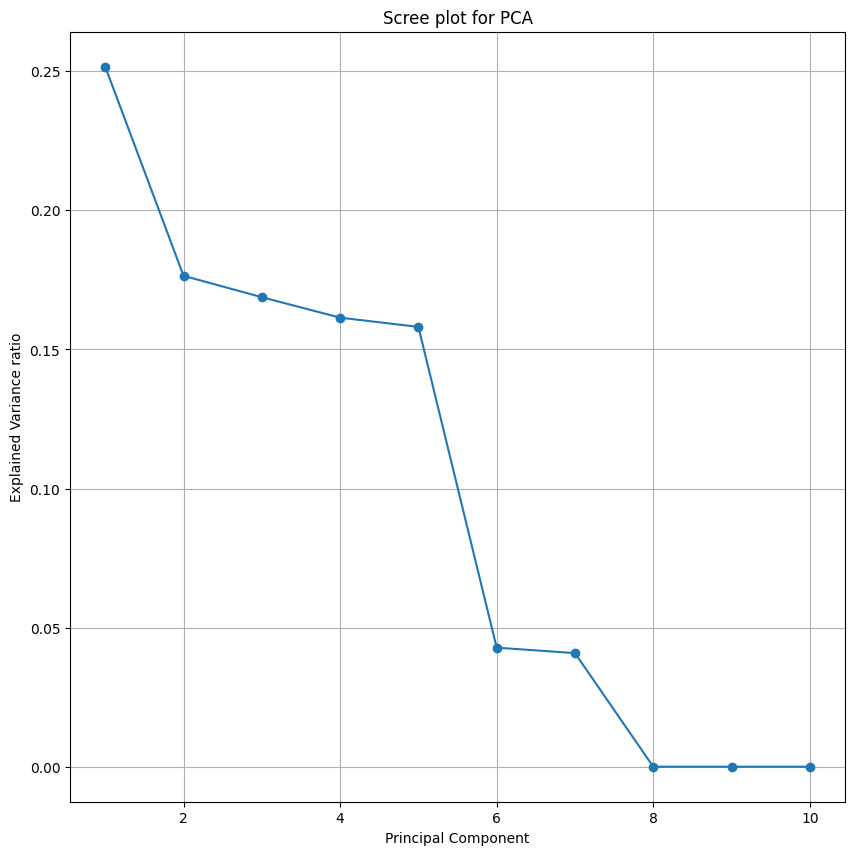

In [20]:
plt.figure(figsize = (10 , 10))
plt.plot(range(1 , pca.n_components_ + 1) , pca.explained_variance_ratio_ , marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance ratio')
plt.title('Scree plot for PCA')
plt.grid(True)

In [21]:
pcaa = PCA(n_components = 8)
x_pcaa = pcaa.fit_transform(x_scaled)

In [22]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_pcaa , y , test_size = 0.2 , random_state = 42)

In [23]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(989, 8) (248, 8) (989,) (248,)


In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(x_train , y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
y_pred_dtc_norm = dtc.predict(x_test)
y_pred_dtc_norm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [26]:
accuracy_score_dtc = accuracy_score(y_test, y_pred_dtc_norm)

report_dtc = classification_report(y_test, y_pred_dtc_norm)

print("Classification Report:")
print(report_dtc)
print("accuracy_score:")
print(accuracy_score_dtc * 100)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       247

    accuracy                           1.00       248
   macro avg       0.50      0.50      0.50       248
weighted avg       0.99      1.00      0.99       248

accuracy_score:
99.59677419354838


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with a specific number of trees
n_trees = 100  # Set the number of trees
rfc = RandomForestClassifier()

# Train the Random Forest model
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
y_pred_rfc = rfc.predict(x_test)

In [29]:
accuracy_score_rfc = accuracy_score(y_test, y_pred_rfc)

report_rfc = classification_report(y_test, y_pred_rfc)

print("Classification Report:")
print(report_rfc)
print("accuracy_score:")
print(accuracy_score_rfc * 100)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       247

    accuracy                           1.00       248
   macro avg       0.50      0.50      0.50       248
weighted avg       0.99      1.00      0.99       248

accuracy_score:
99.59677419354838


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train , y_train)
y_pred_gnb = gnb.predict(x_test)
y_pred_gnb

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [31]:
accuracy_score_gnb = accuracy_score(y_test, y_pred_gnb)

report_gnb = classification_report(y_test, y_pred_gnb)

print("Classification Report:")
print(report_gnb)
print("accuracy_score:")
print(accuracy_score_gnb * 100)

Classification Report:
              precision    recall  f1-score   support

           0       0.09      1.00      0.17         1
           1       1.00      0.96      0.98       247

    accuracy                           0.96       248
   macro avg       0.55      0.98      0.57       248
weighted avg       1.00      0.96      0.98       248

accuracy_score:
95.96774193548387


In [32]:
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier()
lgbmc.fit(x_train , y_train)
y_pred_lgbmc = lgbmc.predict(x_test)
y_pred_lgbmc

[LightGBM] [Info] Number of positive: 985, number of negative: 4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 989, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.995956 -> initscore=5.506347
[LightGBM] [Info] Start training from score 5.506347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [33]:
accuracy_score_lgbmc = accuracy_score(y_test, y_pred_lgbmc)

report_lgbmc = classification_report(y_test, y_pred_lgbmc)

print("Classification Report:")
print(report_lgbmc)
print("accuracy_score:")
print(accuracy_score_lgbmc * 100)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       247

    accuracy                           1.00       248
   macro avg       0.50      0.50      0.50       248
weighted avg       0.99      1.00      0.99       248

accuracy_score:
99.59677419354838


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
!pip install catboost
from catboost import CatBoostClassifier

cbc = CatBoostClassifier()
cbc.fit(x_train , y_train)
y_pred_cbc = cbc.predict(x_test)
y_pred_cbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.3 MB/s eta 0:00:00
Learning rate set to 0.010254
0:	learn: 0.6702413	total: 55ms	remaining: 54.9s
1:	learn: 0.6469180	total: 60.9ms	remaining: 30.4s
2:	learn: 0.6246337	total: 68.5ms	remaining: 22.8s
3:	learn: 0.6041371	total: 74.6ms	remaining: 18.6s
4:	learn: 0.5840727	total: 78.5ms	remaining: 15.6s
5:	learn: 0.5634366	total: 81.4ms	remaining: 13.5s
6:	learn: 0.5447337	total: 84.1ms	remaining: 11.9s
7:	learn: 0.5250446	total: 87ms	remaining: 10.8s
8:	learn: 0.5070980	total: 89.8ms	remaining: 9.88s
9:	learn: 0.4879761	total: 92.6ms	remaining: 9.16s
10:	learn: 0.4708567	total: 95.2ms	remaining: 8.55s
11:	learn: 0.4546120	total: 97.9ms	remaining: 8.06s
12:	learn: 0.4401981	total: 101ms	remaining: 7.63s
13:	learn: 0.4249320	total: 103ms	remaining: 7.27s
14:	learn: 0.4115902	total: 106ms	remaining: 6.96s
15:	learn: 0.3972533	total: 109ms	remaining: 6.68s
16:	learn: 0.3851368	total: 111ms	remaining: 6.44s
17:	learn: 0.3731886	tota

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [35]:
accuracy_score_cbc = accuracy_score(y_test, y_pred_cbc)

report_cbc = classification_report(y_test, y_pred_cbc)

print("Classification Report:")
print(report_cbc)
print("accuracy_score:")
print(accuracy_score_cbc * 100)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       247

    accuracy                           1.00       248
   macro avg       0.50      0.50      0.50       248
weighted avg       0.99      1.00      0.99       248

accuracy_score:
99.59677419354838


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
